In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import pandas as pd

In [91]:
##Simulate a decision-making optimization strategy with three arms: 30%, 60%, and 90%.

#clear
ab = ([5,10], [5,10], [5,10]) #prior assumption: 1/3 for each
p = [0.3, 0.6, 0.9] #true probability of the arms
w_1=0.3 #initial accuracy of execution for the optimal learning rule
w_2=1
w_3=0.4
N = 3 #number of arms

In [92]:
# for testing 
# ab[0][0]
# arm1=1
# prob = []
# ab[arm1][0]/((ab[arm1][0] + ab[arm1][1]))

# for i in range(3):
# # prob[0]=ab[arm1][0]/((ab[arm1][0] + ab[arm1][1]))
#     prob=np.append(prob,ab[arm1][0]/((ab[arm1][0] + ab[arm1][1])))
# prob

In [93]:
def det_range_w1(rand,decision_list):
    # determine which range that rand falls into
    counter=0
    if rand >=decision_list[0] and rand <decision_list[1]:
        counter=0
    elif rand >=decision_list[1] and rand <decision_list[2]:
        counter=1
    elif rand >=decision_list[2] and rand <=decision_list[3]:
        counter=2
    return counter

# when w=0.3 

In [94]:
data = np.zeros((4, 100))#create empty matrix

for trial in range(100):
    post_prob = []
    P_D = np.zeros((1,3))
    for arm1 in range(3):
        post_prob=np.append(post_prob,ab[arm1][0]/((ab[arm1][0] + ab[arm1][1])))

        
    # calcualte the suboptimal decision rule
    Nmax = sum((post_prob == max(post_prob)))
    # In case all arms have the same probability
    if Nmax == N:
        P_D = post_prob
    else:
        for arm in range(3):
            if post_prob[arm] == max(post_prob):
                P_D[arm] = w_1/Nmax
            else:
                P_D[arm] = (1 - w_1)/(N-Nmax)        
#     print("P_D value: ",P_D)   


    # A decision-result(either 0,1, or 2) is made based on the prob of choosing 
    # each ice hole, based on the suboptimal decision rule
    # decisions return in the variable: result
    decision_range = np.cumsum([P_D]) # need edit for decision
    decision_list=np.append([0],decision_range) #[0.         0.33333333 0.66666667 1.        ]
    rand=round(random.uniform(0, 1),1)
    result=det_range_w1(rand,decision_list)
#     print(result)
  
    # reward outcome
    reward=np.random.multinomial(1,[p[result],1-p[result]])
#     print(reward)
    
    new_1=ab[result][0]+reward[0]
    new_2=ab[result][1]+reward[1]
    
  
    # store in data
    data[0][trial] = trial
    data[1][trial] = result * 30
    data[2][trial] = reward[0]
    data[3][trial] = sum(data[2,1:trial]) # didn't change, not sure what that is
    
#     w = w + (0.4/100)

# when w=1

In [95]:
data2 = np.zeros((4, 100))#create empty matrix

for trial2 in range(100):
    post_prob = []
    P_D = np.zeros((1,3))
    for arm1 in range(3):
        post_prob=np.append(post_prob,ab[arm1][0]/((ab[arm1][0] + ab[arm1][1])))

        
    # calcualte the suboptimal decision rule
    Nmax = sum((post_prob == max(post_prob)))
    # In case all arms have the same probability
    if Nmax == N:
        P_D = post_prob
    else:
        for arm in range(3):
            if post_prob[arm] == max(post_prob):
                P_D[arm] = w_2/Nmax
            else:
                P_D[arm] = (1 - w_2)/(N-Nmax)        
#     print("P_D value: ",P_D)   


    # A decision-result(either 0,1, or 2) is made based on the prob of choosing 
    # each ice hole, based on the suboptimal decision rule
    # decisions return in the variable: result
    decision_range = np.cumsum([P_D]) # need edit for decision
    decision_list=np.append([0],decision_range) #[0.         0.33333333 0.66666667 1.        ]
#     print(decision_list)
    rand=round(random.uniform(0, 1),1)#randomnize a float betw 0-1
    result=det_range_w1(rand,decision_list)
#     print(result)
  
    # reward outcome
    reward=np.random.multinomial(1,[p[result],1-p[result]])
#     print(reward)
    
    new_1=ab[result][0]+reward[0]
    new_2=ab[result][1]+reward[1]
    
    data2[0][trial2] = trial2
    data2[1][trial2] = result * 30
    data2[2][trial2] = reward[0]
    data2[3][trial2] = sum(data2[2,1:trial2]) # didn't change, not sure what that is


# when w=0.4

In [96]:
data3 = np.zeros((4, 100))#create empty matrix

for trial3 in range(100):
    post_prob = []
    P_D = np.zeros((1,3))
    for arm1 in range(3):
        post_prob=np.append(post_prob,ab[arm1][0]/((ab[arm1][0] + ab[arm1][1])))

        
    # calcualte the suboptimal decision rule
    Nmax = sum((post_prob == max(post_prob)))
    # In case all arms have the same probability
    if Nmax == N:
        P_D = post_prob
    else:
        for arm in range(3):
            if post_prob[arm] == max(post_prob):
                P_D[arm] = w_3/Nmax
            else:
                P_D[arm] = (1 - w_3)/(N-Nmax)        
#     print("P_D value: ",P_D)   


    # A decision-result(either 0,1, or 2) is made based on the prob of choosing 
    # each ice hole, based on the suboptimal decision rule
    # decisions return in the variable: result
    decision_range = np.cumsum([P_D]) # need edit for decision
    decision_list=np.append([0],decision_range) #[0.         0.33333333 0.66666667 1.        ]
#     print(decision_list)
    rand=round(random.uniform(0, 1),1)#randomnize a float betw 0-1
    result=det_range_w1(rand,decision_list)
#     print(result)
  
    # reward outcome
    reward=np.random.multinomial(1,[p[result],1-p[result]])
#     print(reward)
    
    new_1=ab[result][0]+reward[0]
    new_2=ab[result][1]+reward[1]
    
    data3[0][trial3] = trial3
    data3[1][trial3] = result * 30
    data3[2][trial3] = reward[0]
    data3[3][trial3] = sum(data3[2,1:trial3]) # didn't change, not sure what that is


In [84]:
#read files as df
file_lst=["s01_data","s02_data","s03_data"]
df_lst=[] #create a list of dfs
for file in file_lst:
    df=pd.read_csv(str(file),sep='\t',header=None)
    
    if (file=='s02_data') or (file=='s03_data'):
        df=df.iloc[[0,2,3,4],:]
        df_lst.append(df)
    else:
        df_lst.append(df)

# Plotting

In [85]:
# get x_values, y_values from one df,or data/data2/data3
def y_values(df):
#     x=df[0:1].values
#     x_val=[val for sublist in x for val in sublist]
#     print(x_val)
    if df.shape==(5,100):
        y=df[4:5].values
    else:
#         print(df.iloc[-1].values)
        y=df.iloc[-1].values
    
    y_val=[val for val in y]
#     print(y_val)
    return y_val # x_val can be generated later since all are same

In [86]:
# make a list of list (with y values)
def get_y_values(df_lst):
    y_label_lst=[]
    for df in df_lst:
#         print("load_df",type(df))
        y_current=y_values(df)
        y_label_lst.append(y_current)
    return y_label_lst

In [87]:
def convert_to_df(data):
    df = pd.DataFrame(data)
    return df

In [98]:
def plot_graph(orig_y_list,weight_y_list,label_w):
    fig, ax = plt.subplots()
    ax.set_ylim([0,80])
    x_val=np.arange(1,101,1)
    label=0
    counter=0
    for y_val in orig_y_list:
        ax.plot(x_val, y_val,label='subject '+str(label))
        label+=1
    for y_val in weight_y_list:
#         print(y_val)
        ax.plot(x_val, y_val,label='eG,w= '+label_w[counter])
        counter+=1
    plt.xlabel('Trial')
    plt.ylabel('reward score')
    leg = ax.legend()
    fig.show()

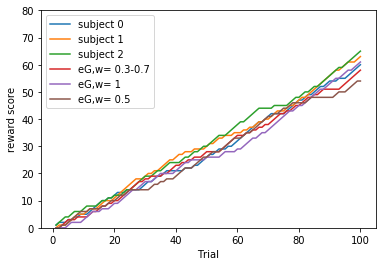

In [99]:
label_w=['0.3-0.7','1','0.5']
plot_list=[df_lst[0],df_lst[1],df_lst[2]]
#read data df 
weighted_list=[data,data2,data3]
data_list=[] #create a list of dfs
for weighted_data in weighted_list:
    weighted_df=pd.DataFrame(weighted_data)
    data_list.append(weighted_df)

data=convert_to_df(data)
orig_y_list=get_y_values(plot_list) # y values from the original df
weight_y_list=get_y_values(data_list) # y values from the weighted df
plot_graph(orig_y_list,weight_y_list,label_w)